In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
x=np.loadtxt('ex3x.dat')
y=np.loadtxt('ex3y.dat')

In [4]:
ones=np.ones([x.shape[0],1])

In [5]:
x=np.concatenate((ones,x),axis=1)

In [6]:
scalar=StandardScaler()

In [7]:
x3=scalar.fit_transform(x)

In [10]:
print(x3.shape)


(47, 3)


In [11]:
print(y.shape)

(47,)


In [12]:
y

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [13]:
X_train=torch.from_numpy(x3.astype(np.float32))


Y_train=torch.from_numpy(y.astype(np.float32))

Y_train=Y_train.view(Y_train.shape[0],1)

X_train.unsqueeze_(1)
Y_train.unsqueeze_(1)

tensor([[[399900.]],

        [[329900.]],

        [[369000.]],

        [[232000.]],

        [[539900.]],

        [[299900.]],

        [[314900.]],

        [[198999.]],

        [[212000.]],

        [[242500.]],

        [[239999.]],

        [[347000.]],

        [[329999.]],

        [[699900.]],

        [[259900.]],

        [[449900.]],

        [[299900.]],

        [[199900.]],

        [[499998.]],

        [[599000.]],

        [[252900.]],

        [[255000.]],

        [[242900.]],

        [[259900.]],

        [[573900.]],

        [[249900.]],

        [[464500.]],

        [[469000.]],

        [[475000.]],

        [[299900.]],

        [[349900.]],

        [[169900.]],

        [[314900.]],

        [[579900.]],

        [[285900.]],

        [[249900.]],

        [[229900.]],

        [[345000.]],

        [[549000.]],

        [[287000.]],

        [[368500.]],

        [[329900.]],

        [[314000.]],

        [[299000.]],

        [[179900.]],

        [[

In [14]:
#input_size=X_train.shape
output_size=1
input_size=3
print(input_size)

3


In [15]:
#model creation
model=nn.Linear(input_size,output_size)

In [16]:
#loss function
loss=nn.MSELoss()

In [17]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [18]:
#now traing loop
los=[]
iterations=300
for epoch in range(iterations):
    y_pred=model(X_train)
    l=loss(Y_train,y_pred)
    los.append(l)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    
       

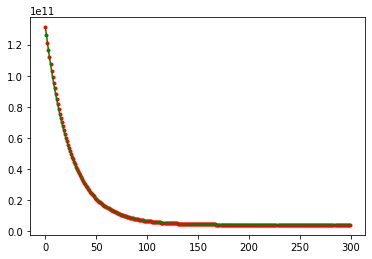

In [19]:
with torch.no_grad():
    plt.plot(los,'r.')
    plt.plot(los,'g')
    plt.show()

In [20]:
#Normal equation
# w=(x.t*x)-1(x.t*y)
x_trans=x.T


In [21]:
A=np.dot(x_trans,x)
B=np.dot(x_trans,y)
inverse=np.linalg.inv(A)
wieghts=np.dot(inverse,B)


In [22]:
p=np.array([[1,1650,3]])

In [23]:
p

array([[   1, 1650,    3]])

In [24]:
pred=np.dot(p,wieghts)

In [25]:
print(pred)

[293081.4643349]


In [26]:
p=scalar.fit_transform(p)
p2=torch.tensor(p,dtype=torch.float32)
pred2=model(p2)

In [27]:
pred2

tensor([[339618.6562]], grad_fn=<AddmmBackward0>)